<a href="https://colab.research.google.com/github/shujatalikhan/Deep_Neural_Network_Learning_Projects/blob/master/deep_neural_network(classification_DogvsCat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!ls


 kagglecatsanddogs_3367a.zip   PetImages        sample_data   y.pickle
'MSR-LA - 3467.docx'	      'readme[1].txt'   X.pickle


In [24]:
!unzip kagglecatsanddogs_3367a.zip 

Archive:  kagglecatsanddogs_3367a.zip
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: PetImages/Cat/0.jpg     
replace PetImages/Cat/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace PetImages/Cat/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: aA
error:  invalid response [aA]
replace PetImages/Cat/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflat

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [0]:
datadir="PetImages" #The largest issue is not all of these images are the same size.

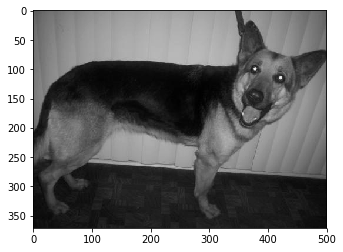

In [6]:
categories=['Dog','Cat']


for category in categories:# do dogs and cats
  path=os.path.join(datadir,category)# create path to dogs and cats
  for img in os.listdir(path):# iterate over each image per dogs and cats
    img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)# convert to array
    plt.imshow(img_array, cmap="gray")# graph it
    plt.show()
    break # we just want one for now so break
  break#...and one more!
    

In [27]:
print(img_array)


[[89 90 91 ... 91 90 89]
 [89 90 91 ... 91 90 89]
 [90 91 92 ... 92 90 89]
 ...
 [16 15 14 ... 13 13 13]
 [15 14 14 ... 13 13 13]
 [13 13 13 ... 13 13 13]]


371 tall, 500 wide, and 3-channel image. 3-channel is because it's RGB (color). We definitely don't want the images that big, but also various images are different shapes, and this is also a problem.

In [28]:
print(img_array.shape)

(371, 500)


<function matplotlib.pyplot.show>

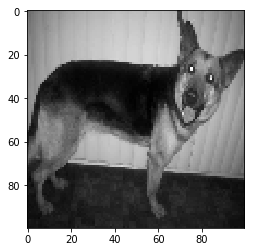

In [29]:
IMG_SIZE=100

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show

In [0]:
training_data =[]

def create_training_data():
  for category in categories:
    path=os.path.join(datadir,category)
    class_num = categories.index(category)# get the classification  (0 or a 1). 0=dog 1=cat
    for img in os.listdir(path): # iterate over each image per dogs and cats
      try:
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # convert to array
        new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))# resize to normalize data size
        training_data.append([new_array,class_num])# add this to our training_data
      except Exception as e:# in the interest in keeping the output clean...
        pass
create_training_data()






In [31]:
print(training_data[:10])

[[array([[ 91,  89,  95, ..., 101,  96,  91],
       [ 94,  92,  96, ..., 102,  99,  93],
       [ 96,  91,  99, ..., 101,  99,  94],
       ...,
       [ 13,  20,  18, ...,  14,  14,  13],
       [ 14,  18,  17, ...,  14,  14,  12],
       [ 14,  14,  15, ...,  15,  13,  13]], dtype=uint8), 0], [array([[216, 149, 153, ..., 153, 152, 196],
       [155, 124, 118, ..., 118, 117, 148],
       [161, 119,  92, ...,  91, 120, 149],
       ...,
       [160, 120, 111, ...,  93, 122, 149],
       [158, 118, 117, ..., 120, 122, 147],
       [199, 139, 140, ..., 140, 139, 184]], dtype=uint8), 0], [array([[ 83,  84,  79, ..., 131, 136, 133],
       [ 81,  84,  77, ..., 139, 130, 136],
       [ 81,  82,  80, ..., 131, 137, 130],
       ...,
       [147, 145, 151, ..., 119, 114, 124],
       [157, 150, 150, ..., 118, 120, 108],
       [151, 142, 141, ..., 109, 111, 114]], dtype=uint8), 0], [array([[ 86, 159, 194, ..., 148, 143, 139],
       [212, 139, 105, ..., 111, 137, 154],
       [147, 145, 105,

In [32]:
print(len(training_data))

24946


Next, we want to shuffle the data. Right now our data is just all dogs, then all cats. This will usually wind up causing trouble too, as, initially, the classifier will learn to just predict dogs always. Then it will shift to oh, just predict all cats! Going back and forth like this is no good either.

In [0]:
import random

random.shuffle(training_data)

In [34]:
for sample in training_data[:10]:
  print(sample[1])

0
1
0
1
0
0
0
0
1
0


In [0]:
X=[]
y=[]

In [0]:
for features,label in training_data:
  X.append(features)
  y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:

In [0]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()



We can always load it in to our current script, or a totally new one by doing:

In [0]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [39]:
X[1]

array([[[ 56],
        [ 55],
        [ 58],
        ...,
        [234],
        [231],
        [233]],

       [[ 60],
        [ 61],
        [ 63],
        ...,
        [235],
        [234],
        [230]],

       [[ 66],
        [ 67],
        [ 67],
        ...,
        [237],
        [234],
        [234]],

       ...,

       [[154],
        [173],
        [165],
        ...,
        [ 60],
        [ 59],
        [ 59]],

       [[177],
        [167],
        [178],
        ...,
        [ 59],
        [ 59],
        [ 57]],

       [[172],
        [159],
        [174],
        ...,
        [ 59],
        [ 59],
        [ 57]]], dtype=uint8)

In [40]:
print(y[1])

1


The Convolutional Neural Network gained popularity through its use with image data, and is currently the state of the art for detecting what an image is, or what is contained in the image.

The basic CNN structure is as follows: Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output



Below is the code for convolution neural network

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow .keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

import pickle

X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

X=X/255

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]) )# defining of input shape is must in intial layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())# this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation('softmax'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

model.save('catvsdog.model')

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 13s 582us/sample - loss: 7.9573 - acc: 0.5009 - val_loss: 8.0766 - val_acc: 0.4934
Epoch 2/10
22451/22451 [==============================] - 13s 580us/sample - loss: 7.9573 - acc: 0.5009 - val_loss: 8.0766 - val_acc: 0.4934
Epoch 3/10
22451/22451 [==============================] - 13s 569us/sample - loss: 7.9573 - acc: 0.5009 - val_loss: 8.0766 - val_acc: 0.4934
Epoch 4/10
22451/22451 [==============================] - 13s 563us/sample - loss: 7.9573 - acc: 0.5009 - val_loss: 8.0766 - val_acc: 0.4934
Epoch 5/10
22451/22451 [==============================] - 13s 564us/sample - loss: 7.9573 - acc: 0.5009 - val_loss: 8.0766 - val_acc: 0.4934
Epoch 6/10
22451/22451 [==============================] - 13s 568us/sample - loss: 7.9573 - acc: 0.5009 - val_loss: 8.0766 - val_acc: 0.4934
Epoch 7/10
22451/22451 [==============================] - 13s 577us/sample - loss: 7.9573 - acc: 0.5009 -

# Analyzing Models with TensorBoard - Deep Learning 

TensorBoard is a handy application that allows you to view aspects of your model, or models, in your browser.

* Con2d with 256  

In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


NAME = "Cats-vs-dogs-CNN"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.3,
          callbacks=[tensorboard])

Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 40s 2ms/sample - loss: 0.7133 - acc: 0.6071 - val_loss: 0.6320 - val_acc: 0.6489
Epoch 2/10
17462/17462 [==============================] - 39s 2ms/sample - loss: 0.5956 - acc: 0.6925 - val_loss: 0.5861 - val_acc: 0.6956
Epoch 3/10
17462/17462 [==============================] - 39s 2ms/sample - loss: 0.5641 - acc: 0.7141 - val_loss: 0.5621 - val_acc: 0.7154
Epoch 4/10
17462/17462 [==============================] - 38s 2ms/sample - loss: 0.5298 - acc: 0.7391 - val_loss: 0.5830 - val_acc: 0.7091
Epoch 5/10
17462/17462 [==============================] - 39s 2ms/sample - loss: 0.4950 - acc: 0.7570 - val_loss: 0.5229 - val_acc: 0.7465
Epoch 6/10
17462/17462 [==============================] - 38s 2ms/sample - loss: 0.4645 - acc: 0.7823 - val_loss: 0.4960 - val_acc: 0.7636
Epoch 7/10
17462/17462 [==============================] - 39s 2ms/sample - loss: 0.4448 - acc: 0.7941 - val_loss: 0.4

* After having run this, you should have a new directory called logs. We can visualize the initial results from this directory using tensorboard now. Open a console, change to your working directory, and type: tensorboard --logdir=logs/. You should see a notice like: TensorBoard 1.10.0 at http://H-PC:6006 (Press CTRL+C to quit) where "h-pc" probably is whatever your machine's name is. Open a browser and head to this address. You should see something like:



## Tensor Board output of Cats-vs-dogs-CNN

![Cats-vs-dogs-CNN](https://user-images.githubusercontent.com/49519213/57575946-39117b80-7455-11e9-92a0-52f922bc6837.png)


* Imp note -Changed the name to NAME = "Cats-vs-dogs-64x2-CNN". Don't forget to do this, or you'll append to your previous model's logs instead by accident and it wont look too good. 



* Conv2d with 64

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Cats-vs-dogs-64x2-CNN"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.3,
          callbacks=[tensorboard])

Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 12s 663us/sample - loss: 0.6499 - acc: 0.6177 - val_loss: 0.6196 - val_acc: 0.6598
Epoch 2/10
17462/17462 [==============================] - 11s 623us/sample - loss: 0.5674 - acc: 0.7087 - val_loss: 0.5355 - val_acc: 0.7337
Epoch 3/10
17462/17462 [==============================] - 11s 623us/sample - loss: 0.4885 - acc: 0.7638 - val_loss: 0.5152 - val_acc: 0.7465
Epoch 4/10
17462/17462 [==============================] - 11s 623us/sample - loss: 0.4233 - acc: 0.8026 - val_loss: 0.5049 - val_acc: 0.7624
Epoch 5/10
17462/17462 [==============================] - 11s 628us/sample - loss: 0.3499 - acc: 0.8449 - val_loss: 0.5414 - val_acc: 0.7560
Epoch 6/10
17462/17462 [==============================] - 11s 619us/sample - loss: 0.2555 - acc: 0.8933 - val_loss: 0.5595 - val_acc: 0.7610
Epoch 7/10
17462/17462 [==============================] - 11s 619us/sample - loss: 0.1552 - acc: 0.9419 -

## Tensor Board output of Cats-vs-dogs-64x2-CNN

![Cats-vs-dogs-64x2-CNN](https://user-images.githubusercontent.com/49519213/57576011-f0f35880-7456-11e9-9b44-534a64efb568.png)


##  The most basic things for us to modify are layers and nodes per layer, as well as 0, 1, or 2 dense layers. and we will see the output in Tensor Board

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1555345219
Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 5s 288us/sample - loss: 0.6306 - acc: 0.6461 - val_loss: 0.6015 - val_acc: 0.6769
Epoch 2/10
17462/17462 [==============================] - 5s 260us/sample - loss: 0.5646 - acc: 0.7113 - val_loss: 0.5768 - val_acc: 0.7002
Epoch 3/10
17462/17462 [==============================] - 5s 262us/sample - loss: 0.5310 - acc: 0.7401 - val_loss: 0.5448 - val_acc: 0.7266
Epoch 4/10
17462/17462 [==============================] - 5s 260us/sample - loss: 0.5063 - acc: 0.7560 - val_loss: 0.5454 - val_acc: 0.7277
Epoch 5/10
17462/17462 [==============================] - 5s 262us/sample - loss: 0.4870 - acc: 0.7724 - val_loss: 0.5359 - val_acc: 0.7345
Epoch 6/10
17462/17462 [==============================] - 5s 260us/sample - loss: 0.4738 - acc: 0.7775 - val_loss: 0.5307 - val_acc: 0.7425
Epoch 7/10
17462/17462 [==============================] - 5s 260us/sample - 

Tensor Board output of 
* 3 conv, 64 nodes per layer, 0 dense
* 3 conv, 128 nodes per layer, 0 dense
* 3 conv, 32 nodes per layer, 0 dense
* 3 conv, 32 nodes per layer, 2 dense
* 3 conv, 32 nodes per layer, 1 dense
* 2 conv, 32 nodes per layer, 0 dense
* 2 conv, 64 nodes per layer, 0 dense
* 3 conv, 128 nodes per layer, 1 dense
* 2 conv, 128 nodes per layer, 0 dense
* 2 conv, 32 nodes per layer, 1 dense

![tensorboard_for_various_layers ](https://user-images.githubusercontent.com/49519213/57575879-ae7c4c80-7453-11e9-9afe-b52863bf40d7.png)


It could be tempting to take the highest validation accuracy model, but I tend to instead go for the best (lowest) validation loss models. Like I said before, there is some randomness when it comes to models, but you should notice trends.

<br /> For one, I notice that the models with 0 dense layers seemed to do better overall. There are some very successful models with dense layers, but I am going to guess one is likely not needed here.

<br /> So, zooming into the validation accuracy graph, let's check some of the best ones. Here are the top 10:

* 3 conv, 64 nodes per layer, 0 dense
* 3 conv, 128 nodes per layer, 0 dense
* 3 conv, 32 nodes per layer, 0 dense
* 3 conv, 32 nodes per layer, 2 dense
* 3 conv, 32 nodes per layer, 1 dense
* 2 conv, 32 nodes per layer, 0 dense
* 2 conv, 64 nodes per layer, 0 dense
* 3 conv, 128 nodes per layer, 1 dense
* 2 conv, 128 nodes per layer, 0 dense
* 2 conv, 32 nodes per layer, 1 dense


From here, I think we can be comfortable with 0 dense, and 3 convolutional layer with 64 nodes as visualizing  from Tensor Boards .As it has good validation accuracy from other layers. 

In [60]:

print(pre) # print the test image

dog.jpg


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1557615690
Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 11s 625us/sample - loss: 0.6337 - acc: 0.6299 - val_loss: 0.6267 - val_acc: 0.6485
Epoch 2/10
17462/17462 [==============================] - 11s 606us/sample - loss: 0.5148 - acc: 0.7502 - val_loss: 0.4927 - val_acc: 0.7655
Epoch 3/10
17462/17462 [==============================] - 11s 608us/sample - loss: 0.4514 - acc: 0.7872 - val_loss: 0.4338 - val_acc: 0.8033
Epoch 4/10
17462/17462 [==============================] - 11s 623us/sample - loss: 0.4023 - acc: 0.8161 - val_loss: 0.4080 - val_acc: 0.8192
Epoch 5/10
17462/17462 [==============================] - 11s 622us/sample - loss: 0.3738 - acc: 0.8335 - val_loss: 0.4208 - val_acc: 0.8060
Epoch 6/10
17462/17462 [==============================] - 11s 614us/sample - loss: 0.3332 - acc: 0.8533 - val_loss: 0.3708 - val_acc: 0.8370
Epoch 7/10
17462/17462 [==============================] - 11s 616us/sa

## Tensor Board output of 3-conv-64-nodes-0-dense-1557615690

![3-conv-64-nodes-0-dense-](https://user-images.githubusercontent.com/49519213/57576057-eab1ac00-7457-11e9-98b1-5d05241d7486.png)


## Prediction on the highest accuracy model 3-conv-64-nodes-0-dense

In [57]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]

pre="dog.jpg"

def prepare(pre):
    IMG_SIZE = 100 # 50 in txt-based
    img_array = cv2.imread(pre, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare(pre)])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[0.]]
Dog
